<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:3.5em;"> Big Mountain Ski Resort's Ticket Price Prediction Problem </span></div>

Big Mountain Resort is a ski resort located in Montana which offers spectacular views of Glacier National Park and Flathead National Forest with access to 105 trails. Every year about 350,000 people ski or snowboard at Big Mountain.

The purpose of this data science project is to come up with a pricing model for ski resort tickets in our market segment.  The resort suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. The resort wants some guidance on how to select a better value for their ticket price based on its facilities so that the resort can increase its revenue. 

This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (*at the resorts).* This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

### Importing the necessary modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### The Ski Resort Data
We will use the data of 330 resorts in the market to model a price for tickets based on facilities and suggest the resort for the suitable ticket price.

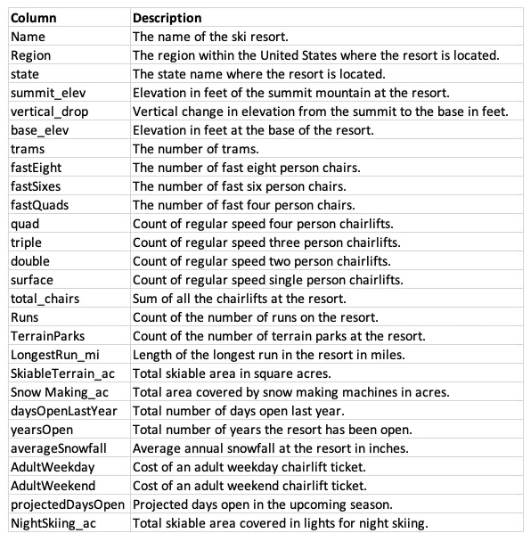

In [2]:
from IPython.display import Image 
Image("ski_resort_data.png")

#### Loading the data

In [3]:
ski_data = pd.read_csv('ski_resort_data.csv')
ski_data.sample(10)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
158,Bretton Woods,New Hampshire,New Hampshire,3100,1500,1600,0,0.0,0,4,...,2.0,464.0,427.0,180.0,46.0,200.0,85.0,99.0,180.0,45.0
95,Alpine Valley Ski Area,Michigan,Michigan,500,240,126,0,NaN,0,0,...,0.2,100.0,100.0,NaN,57.0,20.0,39.0,47.0,NaN,100.0
262,Brian Head Resort,Utah,Utah,10970,1548,9600,0,0.0,0,1,...,0.6,650.0,216.0,149.0,54.0,360.0,42.0,59.0,148.0,NaN
20,Ski China Peak,Sierra Nevada,California,8709,1679,7030,0,0.0,0,0,...,2.2,1400.0,150.0,140.0,62.0,300.0,83.0,83.0,144.0,NaN
69,Paoli Peaks,Indiana,Indiana,900,300,600,0,0.0,0,1,...,0.4,65.0,65.0,75.0,41.0,18.0,38.0,45.0,80.0,65.0
184,Brantling Ski Slopes,New York,New York,850,250,600,0,NaN,0,0,...,0.1,20.0,16.0,NaN,19.0,110.0,32.0,32.0,NaN,NaN
5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.0,0,0,...,0.4,88.0,NaN,110.0,84.0,300.0,47.0,47.0,107.0,NaN
197,Labrador Mt.,New York,New York,1825,700,1125,0,NaN,0,0,...,1.0,250.0,237.0,NaN,62.0,125.0,59.0,59.0,100.0,180.0
287,Suicide Six,Vermont,Vermont,1200,650,550,0,NaN,0,0,...,0.4,100.0,50.0,100.0,85.0,90.0,45.0,75.0,106.0,NaN
205,Snow Ridge,New York,New York,2000,650,1350,0,NaN,0,0,...,0.8,130.0,65.0,73.0,74.0,230.0,38.0,48.0,100.0,40.0


## Data wrangling and cleaning

In [4]:
ski_data.shape

(330, 27)

In [5]:
#Call the info method on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

`AdultWeekday` is the price of an adult weekday ticket. `AdultWeekend` is the price of an adult weekend ticket. The other columns are potential features. This immediately raises the question of what quantity do we want to model? We know we want to model the ticket price, but we see there are two kinds of ticket price!

The output above suggests you have a missing value in the `fastEight` column.

### Resort of Interest

Our resort of interest is called Big Mountain Resort. Let us check it's in the data:

In [6]:
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3


It's good that our resort doesn't appear to have any missing values.

### Missing Values By Column 

Count the number of missing values in each column and sort them.

In [7]:
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= 'count', ascending = False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


`fastEight` has the most missing values, at just over 50%. Unfortunately, there are also missing quite a few of our desired target quantity, the ticket price, which is missing 15-16% of values. `AdultWeekday` is missing in a few more records than `AdultWeekend`. 

### Checking for Duplicate rows

In [8]:
duplicate = ski_data[ski_data.duplicated(keep = False)] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Rows :


,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


This shows that there are no duplicate rows

### Categorical Features

Let us inspect categorical ones such as resort name and state. These are discrete entities. 

In [9]:
#select columns of dtype 'object'
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


#### Region And State

We can tabulate the distinct values along with their respective frequencies using `value_counts()`.

In [10]:
ski_data[['Region', 'state']].value_counts().to_frame()

,,0
Region,state,
New York,New York,33
Michigan,Michigan,29
Colorado,Colorado,22
Sierra Nevada,California,20
Pennsylvania,Pennsylvania,19
New Hampshire,New Hampshire,16
Wisconsin,Wisconsin,16
Vermont,Vermont,15
Minnesota,Minnesota,14


#### Distribution Of Resorts By Region And State

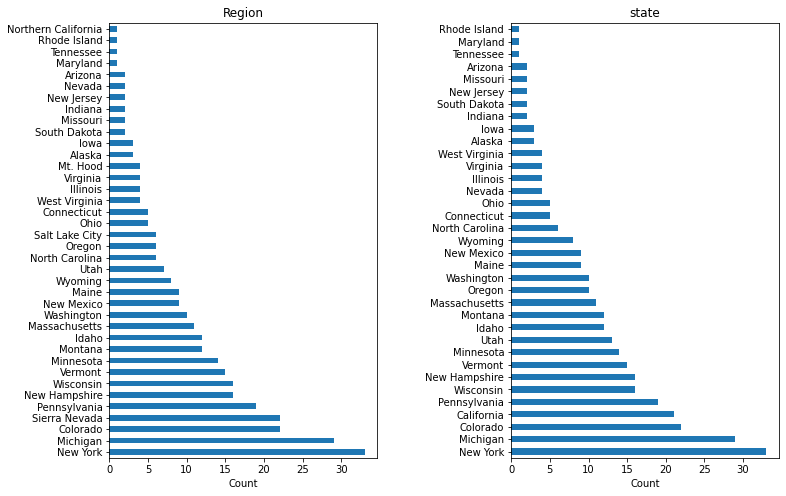

In [11]:
#Create two subplots on 1 row and 2 columns with a figsize of (10, 8)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('state')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5)

Looking at the distribution of States, we see New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 13th place. We should think carefully about 'do we want a model that is skewed for accuracy by New York?' or 'do we just filter for Montana and create a Montana-specific model?'

#### Distribution Of Ticket Price By State

Our primary focus is our Big Mountain resort, in Montana. Does the state provide any clues to decide what primary target response feature should be (weekend or weekday ticket prices)?

#### Average weekend and weekday price by state

In [12]:
# Calculating average weekday and weekend price by state and sort by the average of the two
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


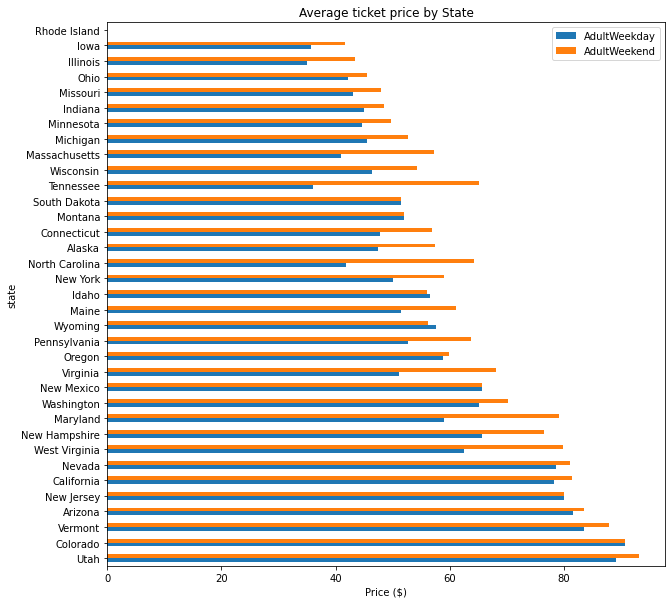

In [13]:
# Reordering the index by increasing average of weekday and weekend prices

(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)')
plt.show()

The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. Also, in each state weekend ticket price is higher than the weekday ticket price.

Thus we currently have two main questions you want to resolve:

* What do you do about the two types of ticket price?
* What do you do about the state information?

### Numeric Features<a id='2.6.4_Numeric_Features'></a>

Having decided to reserve judgement on how exactly you utilize the State, turn your attention to cleaning the numeric features.

#### Numeric data summary

In [14]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Recall that we are missing the ticket prices for some 16% of resorts. This is a fundamental problem that means we simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. 

In [15]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. We definitely want to drop the records for which you have no price information.

#### Target Feature

Finally, what will our target be when modelling ticket price? What relationship is there between weekday and weekend prices?

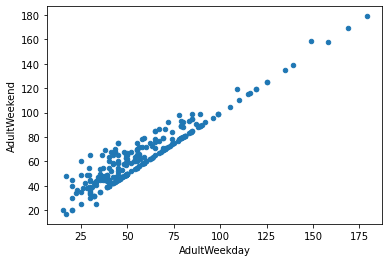

In [16]:
# create a scatterplot with 'AdultWeekday' on the x-axis and 'AdultWeekend' on the y-axis
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the barplot earlier that the distribution for weekday and weekend prices in Montana seemed equal, which is also in the table below.

In [17]:
ski_data.loc[ski_data.state =='Montana', ['AdultWeekend','AdultWeekday']]

,AdultWeekend,AdultWeekday
140,NaN,NaN
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0


Which is missing the least?

In [18]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    51
AdultWeekday    54
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep the weekend price as our target feature.

In [19]:
# Drop 'AdultWeekday'
ski_data.drop(columns='AdultWeekday', inplace=True)

# Drop na values from 'AudultWeekend'
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [20]:
ski_data.shape

(279, 26)

#### Distributions Of Feature Values

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. 

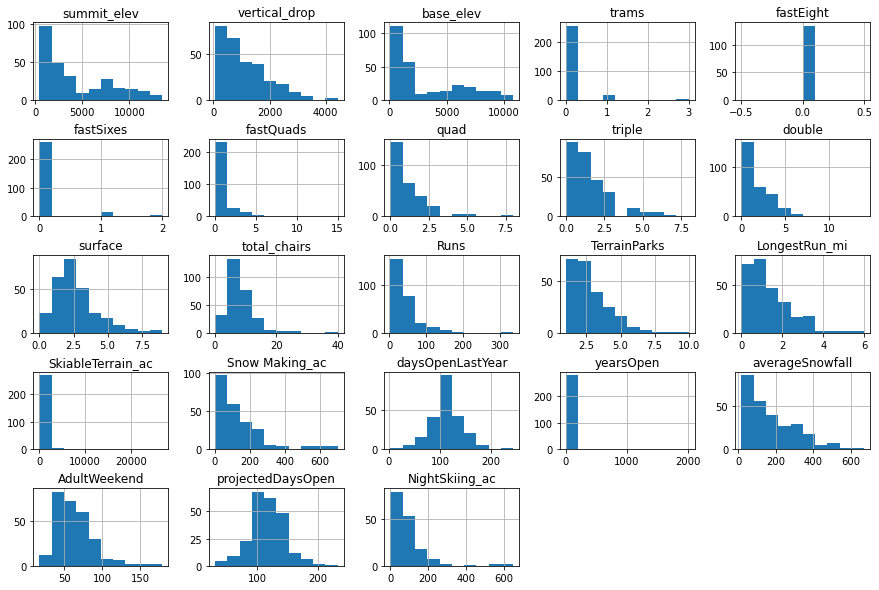

In [21]:
#Using ski_data's `hist` method to plot histograms of each of the numeric features
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show();

What features do we have possible cause for concern about and why?

* trams may get an amber flag for the same reason, it has more variability, but still mostly 0.
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing.
* fastSixes raises an amber flag; it has more variability, but still mostly 0.
* SkiableTerrain_ac because values are clustered down the low end.
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

#### trams
Look at the different trams values more closely:

In [22]:
ski_data.trams.value_counts()

0    257
1     17
3      4
2      1
Name: trams, dtype: int64

Most of the trams have value 0.

#### fastEight
Look at the different fastEight values more closely:

In [23]:
ski_data.fastEight.value_counts()

0.0    134
Name: fastEight, dtype: int64

More than half of the values are missing and all the others are the value zero. There is essentially no information in this column. So we drop the entire column fastEight.

In [24]:
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns='fastEight', inplace=True)

In [25]:
ski_data.shape

(279, 25)

#### fastSixes

Look at the different fastSixes values more closely:

In [26]:
ski_data.fastSixes.value_counts()

0    259
1     14
2      6
Name: fastSixes, dtype: int64

Most of the fastSixes have value 0.

##### SkiableTerrain_ac

In [27]:
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data.loc[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastSixes,0
fastQuads,0
quad,0


* One resort has an incredibly large skiable terrain area! Which is it?

In [28]:
#print the whole row to investigate all values, including seeing the resort name
ski_data[ski_data. SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastSixes,0
fastQuads,0
quad,0


You can check the data. You see your top and base elevation values agree, but the skiable area is very different. Your suspect value is 26819, but the value you've just looked up is 1819. Let us use "data correction" step.

In [29]:
#Using the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [30]:
#Using the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [31]:
#Using the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

What does the distribution of skiable area look like now?

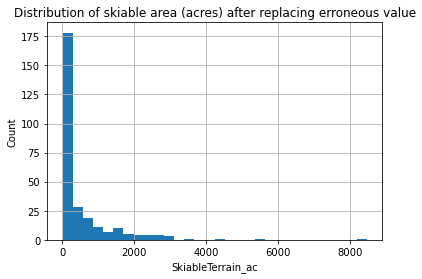

In [32]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

We now see a rather long tailed distribution. we may wonder about the now most extreme value that is above 8000, but similarly you may also wonder about the value around 7000. 

#### yearsOpen

What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [33]:
#Filter the 'yearsOpen' column for values greater than 100
ski_data.loc[ski_data.yearsOpen > 100]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
34,Howelsen Hill,Colorado,Colorado,7136,440,6696,0,0,0,0,...,1.0,6.0,50.0,25.0,100.0,104.0,150.0,25.0,100.0,10.0
115,Pine Knob Ski Resort,Michigan,Michigan,1308,300,1009,0,0,0,0,...,3.0,1.0,80.0,80.0,NaN,2019.0,NaN,57.0,NaN,NaN


Okay, one seems to have been open for 104 years. But beyond that, one is down as having been open for 2019 years. This is wrong! What shall we do about this?

What does the distribution of yearsOpen look like if you exclude just the obviously wrong one?

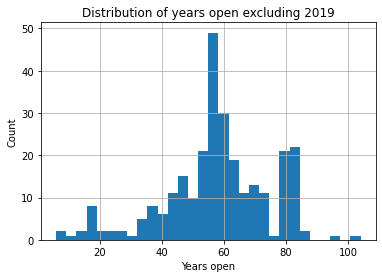

In [34]:
#Using the hist method on 'yearsOpen' after filtering for values under 1000
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The above distribution of years seems entirely plausible, including the 104 year value. We can certainly state that no resort will have been open for 2019 years! It likely means the resort opened in 2019. 

Let's review the summary statistics for the years under 1000.

In [35]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    277.000000
mean      57.902527
std       17.071288
min        6.000000
25%       50.000000
50%       58.000000
75%       70.000000
max      104.000000
Name: yearsOpen, dtype: float64

The smallest number of years open otherwise is 6. We can't be sure whether this resort in question has been open zero years or one year and even whether the numbers are projections or actual. In any case, we would be adding a new youngest resort so it feels best to simply drop this row.

In [36]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

In [37]:
ski_data.shape

(277, 25)

### Derive State-wide Summary Statistics For Our Market Segment

If we want to add any features to our data that captures the state-wide market size, we should do this now. So we'll calculate some state-wide summary statistics for later use.

Features that we may be interested in are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

These features make sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. 

In [38]:
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column= 'daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,12,9680.0,1651.0,31.0,237.0
3,Colorado,14,22232.0,2003.0,40.0,110.0
4,Connecticut,5,358.0,353.0,10.0,256.0


### Review distributions

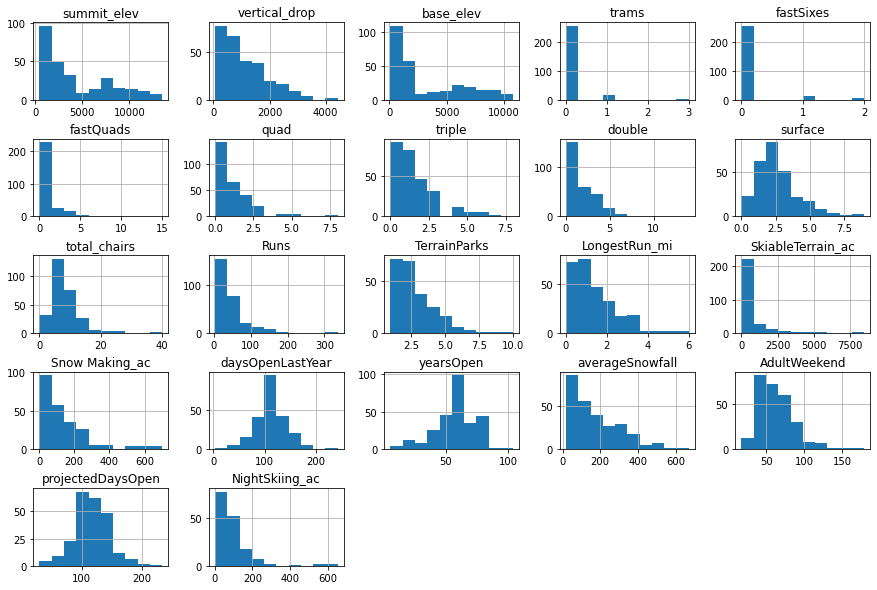

In [39]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

These distributions are much better. There are clearly some skewed distributions, so keep an eye on `fastQuads`, `fastSixes`, and perhaps `trams`. These lack much variance away from 0 and may have a small number of relatively extreme values. 

### Population data

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). 

In [40]:
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [41]:
type(usa_states)

list

In [42]:
len(usa_states)

1

In [43]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[upper-alpha 1] Population[upper-alpha 2][3] Total area[4]  \
  Established[upper-alpha 1] Population[upper-alpha 2][3]           mi2   
0               Dec 14, 1819                      4903185         52420   
1                Jan 3, 1959                       731545        665384   
2               Feb 14, 1912                      7278717        113990   
3               Jun 15, 1836                      3017804         53179   
4                Sep 9, 1850                     39512223        163695   

           Land area[4]          Water area[4]         Numberof Reps.  
       km2          mi2      km2           mi2     km2 Numberof Reps.  
0   135767        50645   131171          1775    4597              7  
1  1723337       570641  1477953         94743  245384              1  
2   295234       113594   294207           396    1026              9  
3   137732        52035   134771          1143    2961              4  
4   423967       155779   403466          7916   20501             53

In [44]:
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[upper-alpha 1], Established[upp

Extract the state name, population, and total area (square miles) columns.

In [45]:
#Use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
usa_states_sub = usa_states.iloc[:, [0, 5, 6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


Do we have all the ski data states accounted for?

In [46]:
#Find the states in `state_summary` that are not in `usa_states_sub`
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Virginia'}

No?? 

If we look at the table on the web, we can perhaps start to guess what the problem is. We can confirm our suspicion by pulling out state names that _contain_ 'Massachusetts', 'Pennsylvania', or 'Virginia' from usa_states_sub:

In [47]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[upper-alpha 3]
37     Pennsylvania[upper-alpha 3]
38     Rhode Island[upper-alpha 4]
45         Virginia[upper-alpha 3]
47                   West Virginia
Name: state, dtype: object

Delete square brackets and their contents and try again:

In [48]:
#Use pandas' Series' `replace()` method to replace anything within square brackets 
usa_states_sub.state.replace(to_replace='\[.*\]', value= '', regex= True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [49]:
# Again verify none of our states are missing 
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

Good! We have an empty set for missing states now. We can confidently add the population and state area columns to the ski resort data.

In [50]:
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub,how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,12,9680.0,1651.0,31.0,237.0,39512223,163695
3,Colorado,14,22232.0,2003.0,40.0,110.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


Having created this data frame of summary statistics for various states, it would seem obvious to join this with the ski resort data to augment it with this additional data. 

In [51]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

In [52]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        34 non-null     object 
 1   resorts_per_state            34 non-null     int64  
 2   state_total_skiable_area_ac  34 non-null     float64
 3   state_total_days_open        34 non-null     float64
 4   state_total_terrain_parks    34 non-null     float64
 5   state_total_nightskiing_ac   34 non-null     float64
 6   state_population             34 non-null     int64  
 7   state_area_sq_miles          34 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.4+ KB


### Resort density

There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total skiing area. The states with the most total days skiing per season are not necessarily those with the most resorts. So we are interested in the ratio of resorts serving a given population or a given area.

Calculate those ratios! Think of them as measures of resort density, and drop the absolute population and state size columns.

In [53]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,12,9680.0,1651.0,31.0,237.0,0.030370,7.330706
3,Colorado,14,22232.0,2003.0,40.0,110.0,0.243109,13.449382
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


How do the distributions of these two new features look?

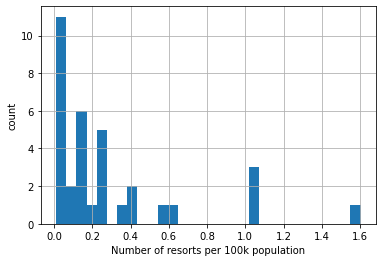

In [54]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

#### Top states by resort density

In [55]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    149.748636
Vermont          103.993344
Massachusetts     94.750805
Connecticut       90.203861
New York          60.489414
Name: resorts_per_100ksq_mile, dtype: float64

### Feature engineering
Having previously spent some time exploring the state summary data you derived, we now start to explore the resort-level data in more detail.  It's now time to merge the two datasets and engineer some intuitive features. For example, we can engineer a resort's share of the supply for a given state.

In [56]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


Having merged state summary features into the ski resort data, add "state resort competition" features:
* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

Once we've derived these features to put each resort within the context of its state,drop those state columns. Their main purpose is to understand what share of states' skiing "assets" is accounted for by each resort.

In [57]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,AdultWeekend,projectedDaysOpen,NightSkiing_ac,resorts_per_state,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,85.0,150.0,550.0,3,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,53.0,90.0,NaN,3,0.410091,0.450867,0.280702,0.130435,0.250000,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,34.0,152.0,30.0,3,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,89.0,122.0,NaN,2,0.027477,1.754540,0.492708,0.514768,0.666667,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,78.0,104.0,80.0,2,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000


#### Feature correlation heatmap
A great way to gain a high level view of relationships amongst the features.

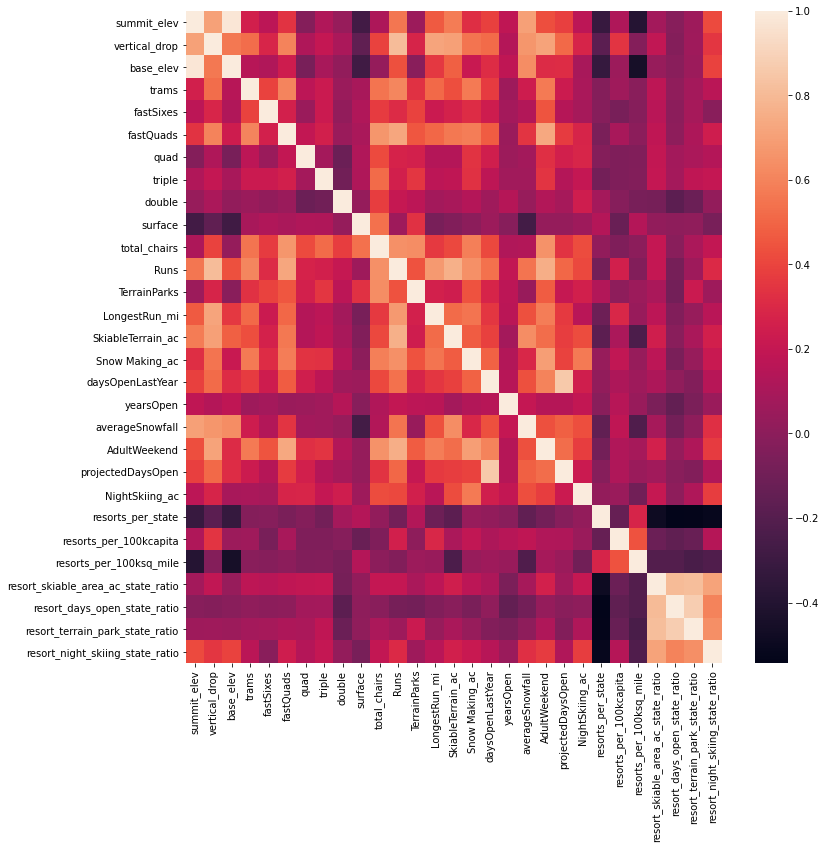

In [58]:
plt.subplots(figsize=(12,12))
sns.heatmap(ski_data.corr());

#### Scatterplots of numeric features against ticket price
Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. We'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [59]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

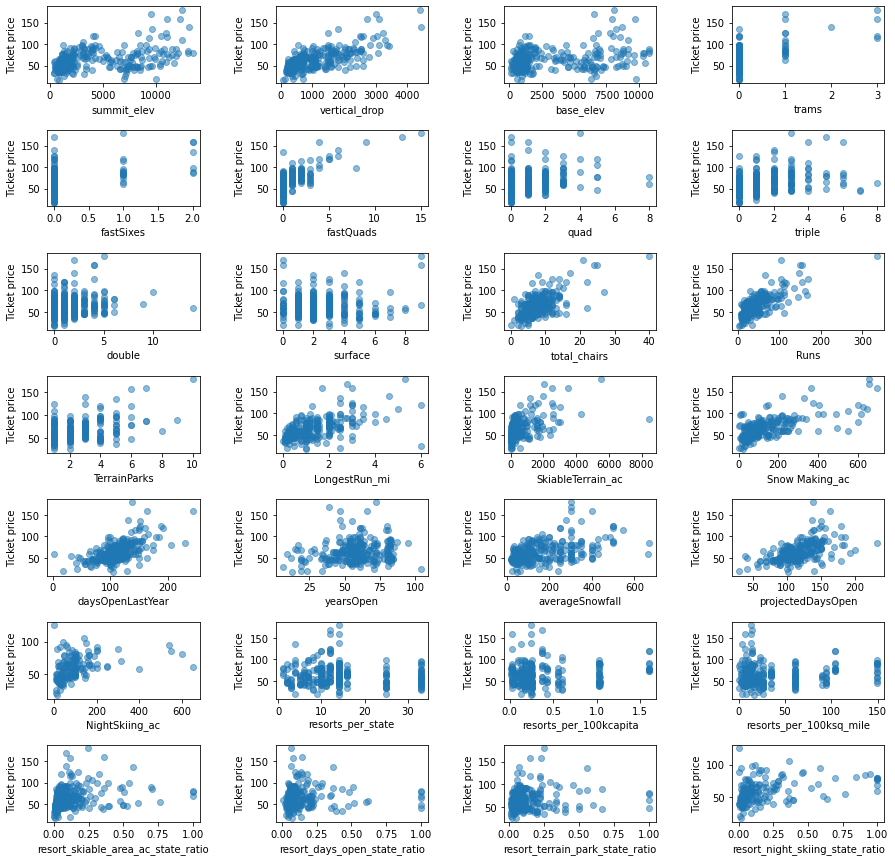

In [60]:
features = [col for col in ski_data.columns 
            if col not in ['Name', 'Region', 'state', 'AdultWeekend']]
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs`.

Now we think of some further features that may be useful in that they relate to how easily a resort can transport people around. We have the numbers of various chairs, and the number of runs, but we don't have the ratio of chairs to runs. It seems logical that this ratio would inform us how easily, and so quickly, people could get to their next ski slope! Create these features now.appear quite similar and also useful.

In [61]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

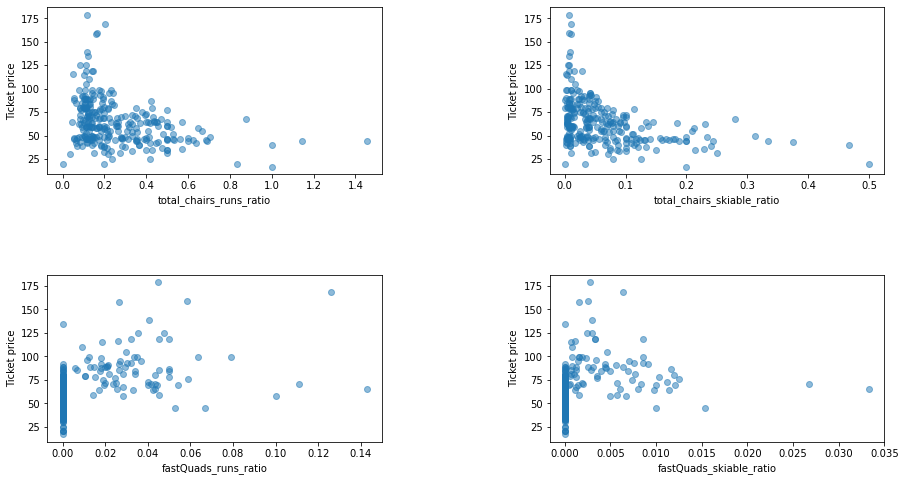

In [62]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

In [63]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


### Save the cleaned data

In [64]:
# Save the data 
ski_data.to_csv('ski_resort_cleaned_data.csv')

## Model Creation

In [65]:
# Importing related modules
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

### Extracting Big Mountain Data
Big Mountain is our resort. Separate it from the rest of the data to use later.

In [66]:
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']
big_mountain.T

,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3
quad,2


In [67]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']

### Train and Test Data 
Spliting the data into Train and Test data using 70/30 ratio.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(ski_data.drop(columns='AdultWeekend'), 
                                                    ski_data.AdultWeekend, test_size=0.3, 
                                                    random_state=47)

In [69]:
X_train.shape, X_test.shape

((193, 35), (83, 35))

In [70]:
y_train.shape, y_test.shape

((193,), (83,))

In [71]:
# Drop the 'Name', 'state', and 'Region' columns from `X_train` and `X_test`. Use 'inplace=True'
names_list = ['Name', 'state', 'Region']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((193, 32), (83, 32))

### Pipelines
One of the most important and useful components of `sklearn` is the Pipeline. In place of `panda`'s `fillna` DataFrame method, there is `sklearn`'s `SimpleImputer`.

The pipeline below has a `fit()` method and a `predict()` method, just like the `LinearRegression()` object itself. 

In [72]:
pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LinearRegression())
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [73]:
# Fit the pipe line
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [74]:
#Make predictions on the train and test sets
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [75]:
# Assess performance

r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8236597176257932, 0.7066402152013971)

In [76]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.471557527555799, 9.450285712531587)

In [77]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(108.29645888138664, 170.03897931940082)

### Refining The Linear Model

##### Redefine our pipeline to include this feature selection step:

In [78]:
pipe = make_pipeline(SimpleImputer(strategy='median'), 
                     StandardScaler(),
                     SelectKBest(f_regression),
                     LinearRegression())

In [79]:
# Fit the pipe line
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fb667026b80>)),
                ('linearregression', LinearRegression())])

In [80]:
#Make predictions on the train and test sets
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [81]:
# Assess performance

r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7674914326052744, 0.6259877354190831)

In [82]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.501495079727484, 11.201830190332057)

In [83]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(142.79127927786533, 216.78725925551495)

### Random Forest Model
A model that can work very well in a lot of cases is the random forest. For regression, this is provided by sklearn's RandomForestRegressor class.

In [84]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median', StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(SimpleImputer(strategy= 'median'),
                        StandardScaler(),
                        RandomForestRegressor(random_state= 47))

In [85]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [86]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.68703516, 0.81032904, 0.77503929, 0.60799653, 0.63326791])

In [87]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.702733586753663, 0.0785517997882075)

### Hyperparameter search using GridSearchCV
Random forest has a number of hyperparameters that can be explored, however here we'll limit yourselves to exploring some different values for the number of trees. We'll try it with and without feature scaling, and try both the mean and median as strategies for imputing missing values.

In [88]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'randomforestregressor__n_estimators': n_est,
               'standardscaler': [StandardScaler(), None],
               'simpleimputer__strategy': ['mean', 'median']}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [89]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid= grid_params, cv= 5, n_jobs=-1)

In [90]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [91]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 69,
 'simpleimputer__strategy': 'median',
 'standardscaler': None}

It looks like imputing with the median helps, but scaling the features doesn't.

In [92]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.68720655, 0.81557827, 0.76799111, 0.62253716, 0.66865433])

In [93]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.7123934846334838, 0.0697995000436174)

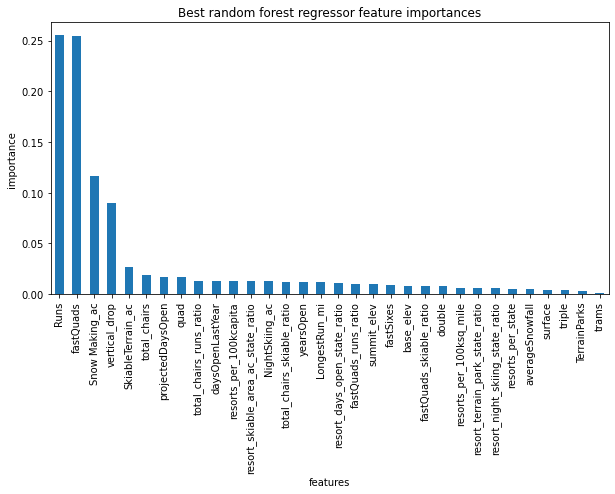

In [94]:
#Plot a barplot of the random forest's feature importances,
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [95]:
# Model Performance
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [96]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.638806430792702, 1.507642242718956)

In [97]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

9.53600314300681

### Conclusion
The random forest model has a lower cross-validation mean absolute error by almost $1. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

### Save the model

In [98]:
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [99]:
# save the model uising  sb_utils file from library folder
from library.sb_utils import save_file
#modelpath = 'models'
#save_file(best_model, 'ski_resort_pricing_model.pkl', modelpath)

## Ticket Price Prediction for Big Mountain Resort using Model 

### Load the Model

In [100]:
import pickle
expected_model_version = 1.0
model_path = 'models/ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [101]:
model= pickle.load(open('models/ski_resort_pricing_model.pkl', 'rb'))
model

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=69, random_state=47))])

### Load the Cleaned data

In [102]:
ski_data = pd.read_csv('ski_resort_cleaned_data.csv')
ski_data.head()

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,...,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276,0.092105,0.004348,0.026316,0.001242
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,...,0.410091,0.450867,0.280702,0.130435,0.250000,NaN,0.111111,0.006250,0.000000,0.000000
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,...,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724,0.230769,0.100000,0.000000,0.000000
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,...,0.027477,1.754540,0.492708,0.514768,0.666667,NaN,0.145455,0.010296,0.000000,0.000000
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,...,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000,0.107692,0.008750,0.015385,0.001250


In [103]:
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']
big_mountain.T

,124
Unnamed: 0,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3


### Refit Model on the Data

In [104]:
X = ski_data.loc[ski_data.Name != "Big Mountain Resort", model.X_columns]
y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']

In [105]:
len(X), len(y)

(276, 276)

In [106]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=69, random_state=47))])

In [107]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', 
                            cv=5, n_jobs=-1)
cv_results

{'fit_time': array([0.66775203, 0.67666984, 0.63422823, 0.60360217, 0.32533765]),
 'score_time': array([0.01352501, 0.01262403, 0.018857  , 0.01963878, 0.00933313]),
 'test_score': array([-11.83298654,  -9.27972596, -11.31247958,  -7.92011594,
        -11.30075362])}

In [108]:
cv_results['test_score']

array([-11.83298654,  -9.27972596, -11.31247958,  -7.92011594,
       -11.30075362])

In [109]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(10.32921232825146, 1.4884361528502013)

### Calculating Expected Big Mountain Ticket Price From The Model

In [110]:
X_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", model.X_columns]
y_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", 'AdultWeekend']

In [111]:
bm_pred = model.predict(X_bm).item() 
y_bm = y_bm.values.item()

In [112]:
print(f'Big Mountain Resort modelled price is ${bm_pred:.2f}, actual price is ${y_bm:.2f}.')
print(f'Even with the expected mean absolute error of ${mae_mean:.2f}, this suggests there is room for an increase.')

Big Mountain Resort modelled price is $94.65, actual price is $81.00.
Even with the expected mean absolute error of $10.33, this suggests there is room for an increase.


### Big Mountain Resort In Market Context
Let us compare the situation of Big Mountain Resort with all other resorts in the market for price and other cases.

In [113]:
# Writing `plot_compare` function that displays a vertical, dashed line
#on the histogram to indicate Big Mountain's position in the distribution
def plot_compare(feat_name, description, state=None, figsize=(10, 5)):
    """Graphically compare distributions of features.
    
    Plot histogram of values for all resorts and reference line to mark
    Big Mountain's position.
    
    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    state - select a specific state (None for all states)
    figsize - (optional) figure size
    """
    
    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if state is None:
        ski_x = ski_data[feat_name]
    else:
        ski_x = ski_data.loc[ski_data.state == state, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    plt.axvline(x=big_mountain[feat_name].values, c='r', ls='--', alpha=0.8, label='Big Mountain')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for resorts in market share')
    plt.legend()

#### Ticket price

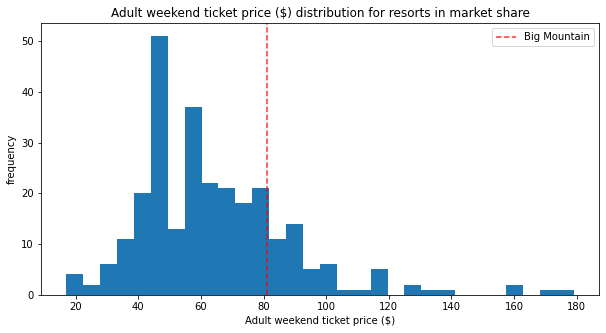

In [114]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($)')

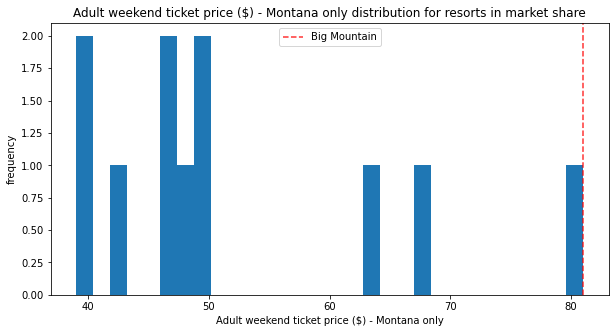

In [115]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($) - Montana only',
             state='Montana')

#### Vertical drop

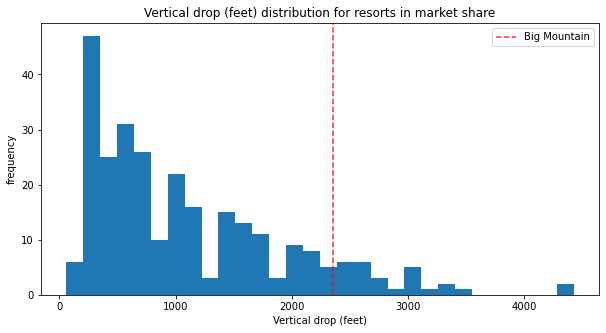

In [116]:
plot_compare('vertical_drop', 'Vertical drop (feet)')

#### Snow making area

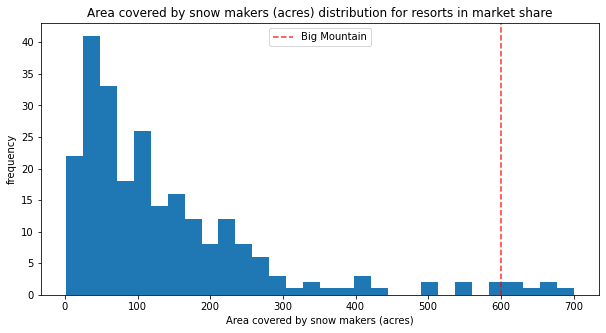

In [117]:
plot_compare('Snow Making_ac', 'Area covered by snow makers (acres)')

#### Total number of chairs

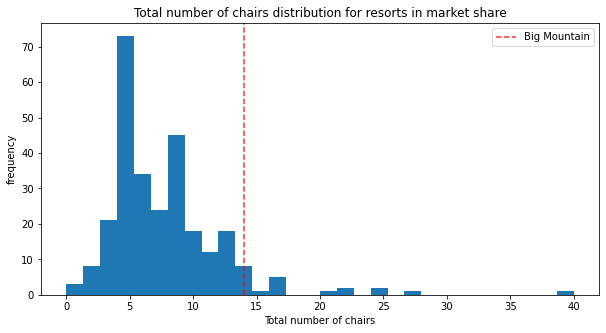

In [118]:
plot_compare('total_chairs', 'Total number of chairs')

#### Runs

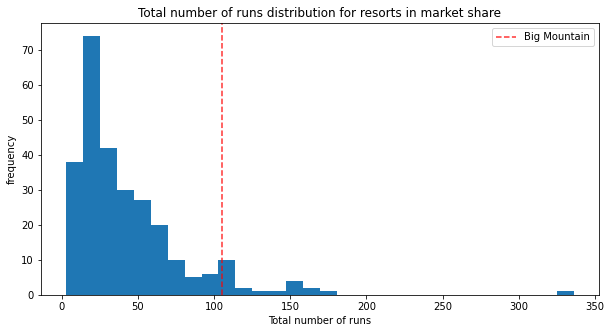

In [119]:
plot_compare('Runs', 'Total number of runs')

#### Longest run

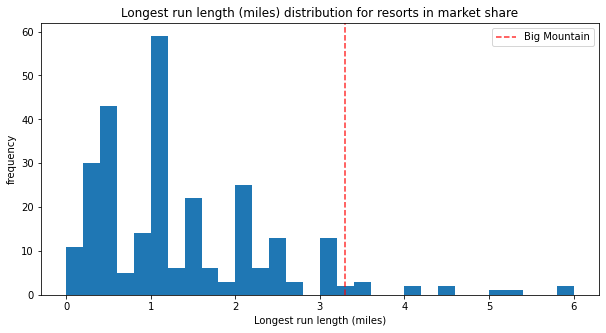

In [120]:
plot_compare('LongestRun_mi', 'Longest run length (miles)')

#### Skiable terrain area

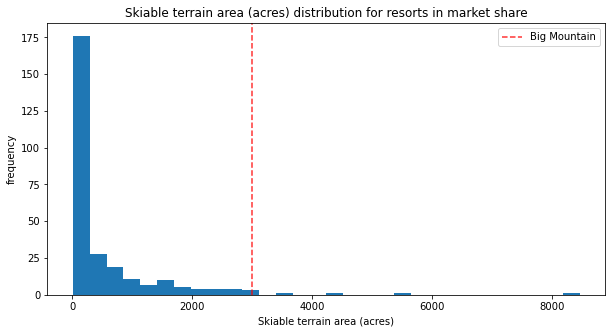

In [121]:
plot_compare('SkiableTerrain_ac', 'Skiable terrain area (acres)')

### Modeling scenarios

Big Mountain Resort has been reviewing potential scenarios for either cutting costs or increasing revenue (from ticket prices). Ticket price is not determined by any set of parameters; the resort is free to set whatever price it likes. However, the resort operates within a market where people pay more for certain facilities, and less for others. Being able to sense how facilities support a given ticket price is valuable business intelligence. This is where the utility of our model comes in.

The business has shortlisted some options:
1. Permanently closing down up to 10 of the least used runs. This doesn't impact any other resort statistics.
2. Increase the vertical drop by adding a run to a point 150 feet lower down but requiring the installation of an additional chair lift to bring skiers back up, without additional snow making coverage
3. Same as number 2, but adding 2 acres of snow making cover
4. Increase the longest run by 0.2 mile to boast 3.5 miles length, requiring an additional snow making coverage of 4 acres

The expected number of visitors over the season is 350,000 and, on average, visitors ski for five days. Assume the provided data includes the additional lift that Big Mountain recently installed.

In [122]:
expected_visitors = 350_000

In [123]:
all_feats = ['vertical_drop', 'Snow Making_ac', 'total_chairs', 'fastQuads', 
             'Runs', 'LongestRun_mi', 'trams', 'SkiableTerrain_ac']
big_mountain[all_feats]

,vertical_drop,Snow Making_ac,total_chairs,fastQuads,Runs,LongestRun_mi,trams,SkiableTerrain_ac
124,2353,600.0,14,3,105.0,3.3,0,3000.0


In [124]:

#create the modified scenario dataframe(bm2) and make a ticket price prediction for it. 

def predict_increase(features, deltas):
    """Increase in modelled ticket price by applying delta to feature.
    
    Arguments:
    features - list, names of the features in the ski_data dataframe to change
    deltas - list, the amounts by which to increase the values of the features
    
    Outputs:
    Amount of increase in the predicted ticket price 
    """
    
    bm2 = X_bm.copy()
    for f, d in zip(features, deltas):
        bm2[f] += d
    return model.predict(bm2).item() - model.predict(X_bm).item()

#### Scenario 1
Close up to 10 of the least used runs. The number of runs is the only parameter varying.

In [125]:
runs_delta = [i for i in range(-1, -11, -1)]
price_deltas = [predict_increase(['Runs'], [delta]) for delta in runs_delta]
price_deltas

[-0.6956521739130466,
 -0.9275362318840621,
 -1.0289855072463894,
 -1.0289855072463894,
 -1.0289855072463894,
 -1.4927536231884062,
 -1.4927536231884062,
 -1.4927536231884062,
 -1.9420289855072497,
 -1.9420289855072497]

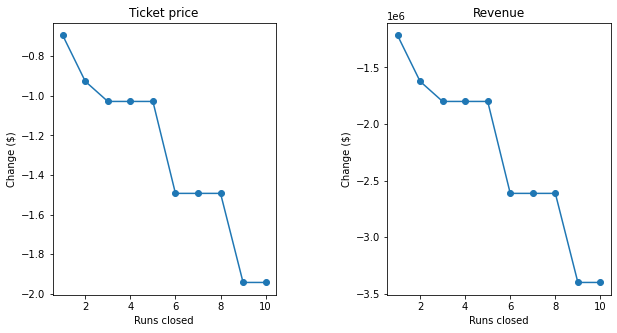

In [126]:
#Create two plots for the predicted ticket price change (delta) for each
#condition (number of runs closed) in the scenario and the associated predicted revenue
#change on the assumption that each of the expected visitors buys 5 tickets

runs_closed = [-1 * i for i in runs_delta] #1
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
ax[0].plot(runs_closed, price_deltas, 'o-')
ax[0].set(xlabel='Runs closed', ylabel='Change ($)', title='Ticket price')
revenue_deltas = [5 * expected_visitors * p for p in price_deltas] #2
ax[1].plot(runs_closed, revenue_deltas, 'o-')
ax[1].set(xlabel='Runs closed', ylabel='Change ($)', title='Revenue');

The model says closing one run makes no difference. Closing 2 and 3 successively reduces support for ticket price and so revenue. If Big Mountain closes down 3 runs, it seems they may as well close down 4 or 5 as there's no further loss in ticket price. Increasing the closures down to 6 or more leads to a large drop.

#### Scenario 2
In this scenario, Big Mountain is adding a run, increasing the vertical drop by 150 feet, and installing an additional chair lift.

In [127]:
#Call `predict_increase` with a list of the features 'Runs', 'vertical_drop', and 
#'total_chairs' and associated deltas of 1, 150, and 1
ticket2_increase = predict_increase(['Runs','vertical_drop', 'total_chairs'], [1, 150, 1])
revenue2_increase = 5 * expected_visitors * ticket2_increase

In [128]:
print(f'This scenario increases support for ticket price by ${ticket2_increase:.2f}')
print(f'Over the season, this could be expected to amount to ${revenue2_increase:.0f}')

This scenario increases support for ticket price by $1.90
Over the season, this could be expected to amount to $3322464


#### Scenario 3
In this scenario, you are repeating the previous one but adding 2 acres of snow making.

In [129]:
#Repeat scenario 2 conditions, but add an increase of 2 to `Snow Making_ac`
ticket3_increase = predict_increase(['Runs', 'vertical_drop', 'total_chairs', 
                                     'Snow Making_ac'], [1, 150, 1, 2])
revenue3_increase = 5 * expected_visitors * ticket3_increase

In [130]:
print(f'This scenario increases support for ticket price by ${ticket3_increase:.2f}')
print(f'Over the season, this could be expected to amount to ${revenue3_increase:.0f}')

This scenario increases support for ticket price by $1.90
Over the season, this could be expected to amount to $3322464


#### Scenario 4
This scenario calls for increasing the longest run by .2 miles and guaranteeing its snow coverage by adding 4 acres of snow making capability.

In [131]:
#Predict the increase from adding 0.2 miles to `LongestRun_mi` and 4 to `Snow Making_ac`
predict_increase(['LongestRun_mi', 'Snow Making_ac'], [0.2, 4])

0.0

### Summary
The Big Mountain Resort is currently charging  $81 per ticket. It is very high compared with  whole United states average price of $64 and Montana State average price of $52. But according to the model, the modelled ticket price at the Big Mountain Resort should be $94.65. Even with the expected mean absolute error of $10.39, this suggests there is room for an increase. The validity of the model lies in the assumption that other resorts accurately set their prices.

I found two important scenarios which can help to increase the revenue with a remarkable amount  by making small changes in facilities. In the first scenario, if Big Mountain is adding a run, increasing the vertical drop by 150 feet, and installing an additional chair lift then the revenue can be expected to increase by the amount $3322464 with the  increase of ticket price by $1.90. Also, in the second scenario, if Big Mountain is repeating the same previous facilities with the addition of 2 acres of snow making then the revenue can be expected to increase again by the amount $3322464 with the  increase of ticket price by $1.90. 

Also the model says closing one run makes no difference. Closing 2 and 3 successively reduces support for ticket price and so revenue. If Big Mountain closes down 3 runs, it seems they may as well close down 4 or 5 as there's no further loss in ticket price. Increasing the closures down to 6 or more leads to a large drop.